In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
%run pandas-missing-extension.ipynb

## Cargamos nuestros datos

In [3]:
CURRENT_DIR = os.getcwd()  # Ruta actual de trabajo
DATA_DIR = os.path.join(CURRENT_DIR, os.pardir, "data", "vgsales.csv")

In [24]:
# Leer el archivo csv en un DataFrame de Pandas
df = pd.read_csv(DATA_DIR, delimiter=',')
df1 = df.copy()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# valores nulos
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
# Resumen por variable
df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,Rank,0,16598,0.000000
1,Name,0,16598,0.000000
2,Platform,0,16598,0.000000
3,Year,271,16598,1.632727
4,Genre,0,16598,0.000000
5,Publisher,58,16598,0.349440
6,NA_Sales,0,16598,0.000000
7,EU_Sales,0,16598,0.000000
8,JP_Sales,0,16598,0.000000
9,Other_Sales,0,16598,0.000000


In [9]:
# Tabulación del resumen por variable
df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,9,81.818182
1,58,1,9.090909
2,271,1,9.090909


In [10]:
# Tabulación del resumen por caso
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,16291,98.150380
1,1,285,1.717074
2,2,22,0.132546


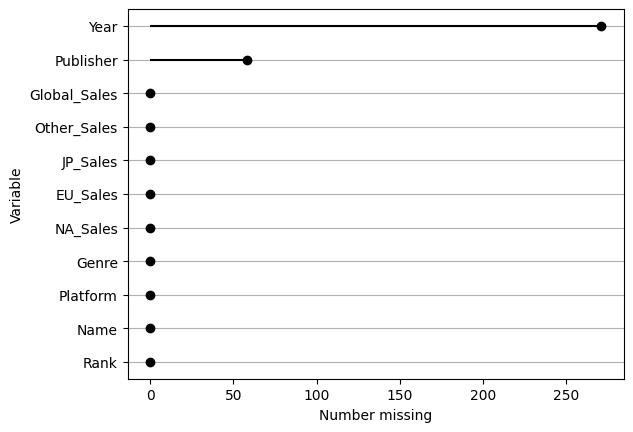

In [11]:
# grafica de datos faltantes
df.missing.missing_variable_plot()

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

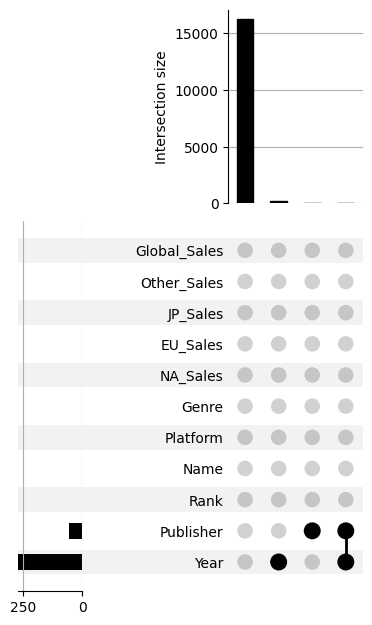

In [12]:
# grafica de datos faltantes
(
    df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

In [13]:
# Filtramos los valores fatantes en 'Year'
mask = df['Year'].isnull()
df_filtrado = df.loc[mask]

# Imprimimos el DataFrame filtrado
df_filtrado.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [14]:
# guardamos nuestro df en un archivo csv para ser procesado en google sheets
df_filtrado.to_csv('resultados.csv', index=False)

In [18]:
# cargamos nuestros resultados con GPT
CURRENT_DIR1 = os.getcwd()  # Ruta actual de trabajo
DATA_DIR1 = os.path.join(CURRENT_DIR1, os.pardir, "data", "google.csv")
df2 = pd.read_csv(DATA_DIR1, delimiter=';')
GPT_df = df2.copy()

In [20]:
# Eliminalos las filas con datos faltates en 'year'
df = df.dropna(subset=['Year'])

In [21]:
# Concatenar los dos DataFrames uno encima del otro
df_concat = pd.concat([df, GPT_df])
df_concat.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
# verificamos que el tamaño del dataset sea el mismo 
print("Número de filas df orginal    :", df1.shape[0])
print("Número de filas df concatenado:", df_concat.shape[0])

Número de filas df orginal    : 16598
Número de filas df concatenado: 16598


In [26]:
# valores nulos
print(df_concat.isnull().sum())

Rank             0
Name             0
Platform         0
Year             2
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


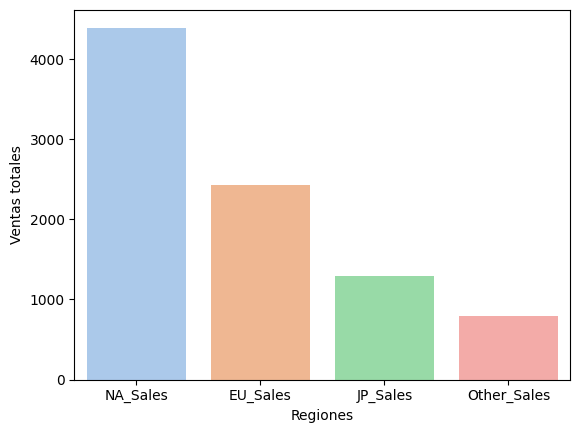

In [27]:
# Seleccionar solo las columnas
df_pc = df_concat[['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales']]

# Calcular la suma de las ventas
ventas_totales = df_pc.sum()

# Configurar la paleta de colores
sns.set_palette('pastel')

# Generar el gráfico de barras
ax = sns.barplot(x=ventas_totales.index, y=ventas_totales.values)
ax.set_xlabel('Regiones')
ax.set_ylabel('Ventas totales')
plt.show()

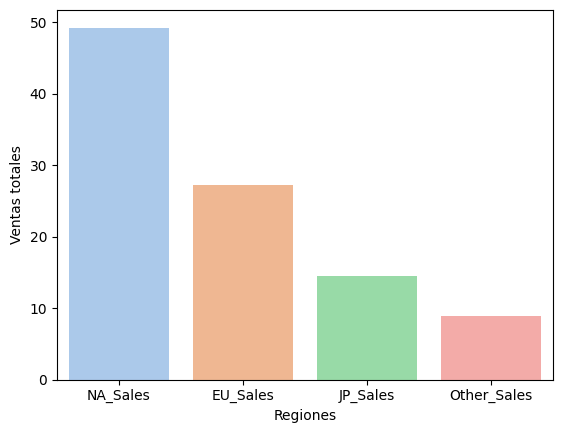

In [29]:
# Seleccionar solo las columnas
ventas_porcentaje = (df_pc.sum() / df_concat['Global_Sales'].sum()) * 100

# Generar el gráfico de barras
ax = sns.barplot(x=ventas_porcentaje.index, y=ventas_porcentaje.values)
ax.set_xlabel('Regiones')
ax.set_ylabel('Ventas totales')
plt.show()


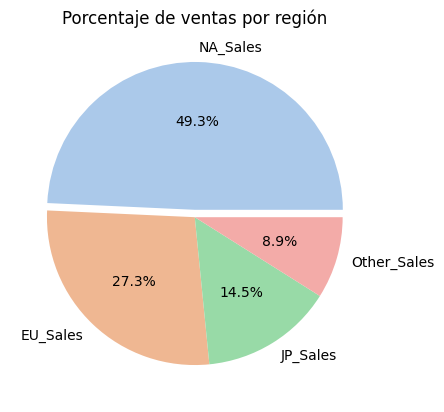

In [30]:
# Generar el gráfico de pie con el porcentaje
colores = ['#ABC9EA', '#EFB792', '#98DAA7', '#F3ABA8']
explode = [0.05, 0, 0, 0] # Para resaltar un trozo del gráfico
plt.pie(ventas_porcentaje, labels=ventas_porcentaje.index, colors=colores, explode=explode, autopct='%1.1f%%')
plt.title('Porcentaje de ventas por región')
plt.show()

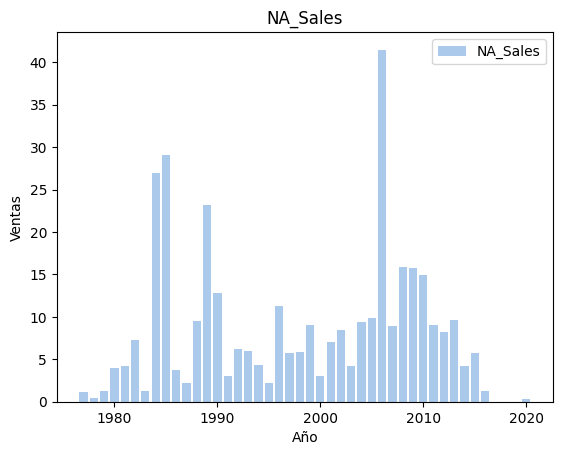

In [35]:
# Seleccionar solo las columnas de region1 y region2 y ordenarlas por año
df_selected =  df_concat[['Year', 'NA_Sales', 'EU_Sales','JP_Sales','Global_Sales']].sort_values('Year')
# Generar la figura y el eje
fig, ax = plt.subplots()
ax.set_xlabel('Año')
ax.set_ylabel('Ventas')
ax.set_title('NA_Sales')

# Agregar las barras de cada región
ax.bar(df_selected['Year'], df_selected['NA_Sales'], label='NA_Sales', color='#ABC9EA')

# Agregar la leyenda
ax.legend(loc='upper right')

# Mostrar la figura
plt.show()